# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [ ]:
data=pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.shape

(50000, 2)

In [ ]:
data = data.iloc[:20000,:]

In [ ]:
data.shape

(20000, 2)

In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
negative,10097
positive,9903


<Axes: xlabel='sentiment'>

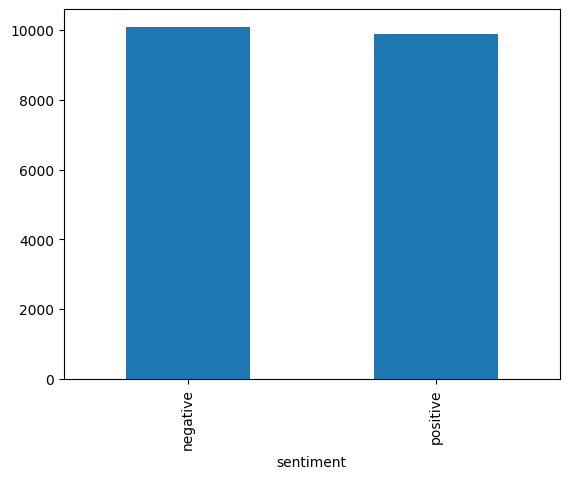

In [ ]:
data['sentiment'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'label distribution')

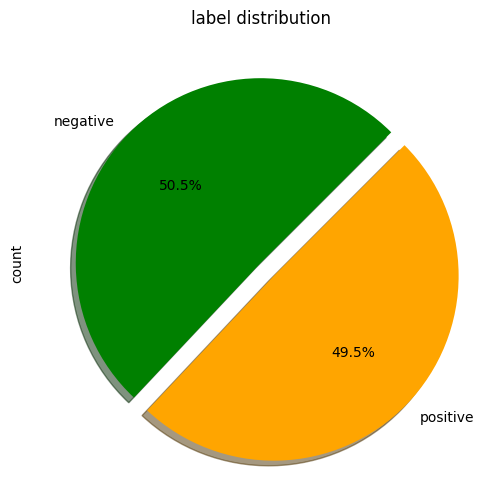

In [ ]:
plt.figure(figsize=(10,6))
colors = ['green', 'orange']
data['sentiment'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,
                 explode=(0, 0.1))
plt.title('label distribution')

In [ ]:
data['review'][999]

"This is like a zoology textbook, given that its depiction of animals is so accurate. However, here are a few details that appear to have been slightly modified during the transition to film:<br /><br />- Handgun bullets never hit giant Komodo dragons. It doesn't matter how many times you shoot at the Komodo, bullets just won't go near it.<br /><br />- The best way to avoid being eaten by a giant Cobra, or a giant Komodo dragon, is just to stand there. The exception to this rule is if you've been told to stay very still, in which case you should run off, until the Komodo is right next to you, and then you should stand there, expecting defeat.<br /><br />- Minutes of choppy slow motion footage behind the credits really makes for enjoyable watching.<br /><br />- $5,000 is a memory enhancement tool, and an ample substitute for losing your boating license/getting arrested.<br /><br />- Members of elite army units don't see giant Komodo dragons coming until they are within one metre of the 

In [ ]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Preprocessing Data

In [ ]:
# Load stopwords and initialize tools
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocessing(text):
    # Remove HTML tags
    text = re.sub('<[^>]*>', '', text)

    # Extract emojis
    emojis = emoji_pattern.findall(text)

    # Clean symbols and convert to lowercase
    text = re.sub(r'\W+', ' ', text.lower())

    # Append emojis back after cleaning
    text += ' ' + ' '.join(emojis).replace('-', '')

    # Tokenization (split text into words)
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords_set]

    # Apply stemming
    stemmed = [stemmer.stem(word) for word in tokens]

    # Apply lemmatization
    lemmatized = [lemmatizer.lemmatize(word) for word in stemmed]
    # Return the final processed text
    return " ".join(lemmatized)

In [ ]:
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')

'tag helo world : )'

In [ ]:
data['review'] = data['review'].apply(lambda x: preprocessing(x))

In [ ]:
data['review']

,review
0,one review mention watch 1 oz episod hook righ...
1,wonder littl product film techniqu unassum old...
2,thought wonder way spend time hot summer weeke...
3,basic famili littl boy jake think zombi closet...
4,petter mattei love time money visual stun film...
...,...
19995,ok starter taxi driver amaz taxi driver amaz b...
19996,sort hard say greatli enjoy target paper moon ...
19997,still like though warren beatti fair comic boo...
19998,could still use black adder even today imagin ...


In [ ]:
print(data['sentiment'].unique())
print(data['sentiment'].value_counts())


['positive' 'negative']
sentiment
negative    10097
positive     9903
Name: count, dtype: int64


In [ ]:
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})


In [ ]:
positivedata = data[data['sentiment'] == 1]['review']
negdata = data[data['sentiment'] == 0]['review']


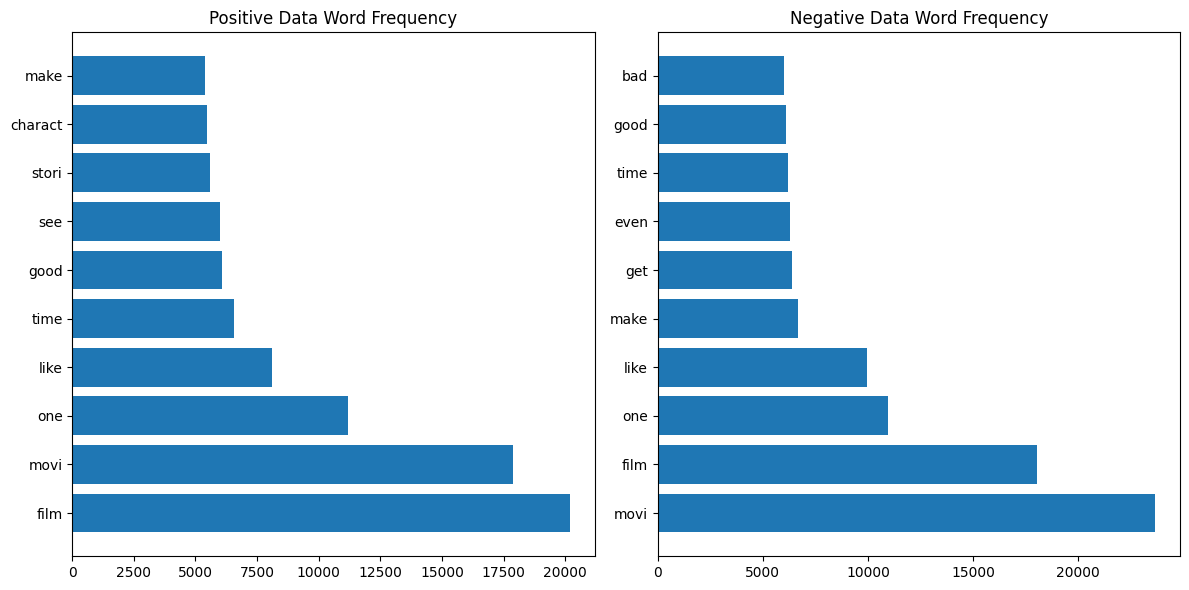

In [ ]:
positivedata = data[data['sentiment'] == 1]
positivedata = positivedata['review']
negdata = data[data['sentiment'] == 0]
negdata = negdata['review']

import matplotlib.pyplot as plt
from collections import Counter

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()

# spilitting Datat

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.sentiment.values
x=tfidf.fit_transform(data.review)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

# Modelling

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    5.2s finished


In [ ]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8808


In [ ]:
# Classification Report : Precision, Recall, F1-Score, Support)
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      5125
           1       0.86      0.90      0.88      4875

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



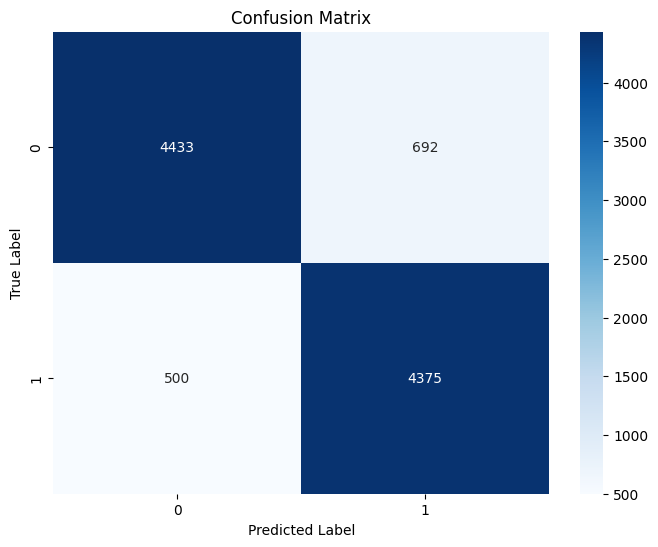

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

# Prediction

In [ ]:

def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction


prediction = prediction('one cerebr insight movi ever seen script languag costum sceneri plot charact etc suprem bore watch intens even listen movi work mani time lost count scarlett age grace acquir wisdom beyond year end movi take tara ireland famili origin see result anoth civil war play time irish english movi depict doubl standard men time man still respect girlfriend whore woman mere seen privat place man societi accus improprieti cours scarlett alway think outsid box break rule necessari creat need chang help peopl surviv scarlett beauti definit bone strength self esteem wisdom grow age rememb line confront much plate tomorrow anoth day way carri determin courag learn experi good movi show daughter teach woman import respect men especi handsom one two side may treat woman differ depend act respect attract woman need learn movi teach movi like therapi better gone wind second part take place ireland anyon irish decent cherish sceneri peopl scarlett charact within')

In [ ]:
if prediction == 1:
    print("positive comment")
else:
    print("negative comment")

positive comment


In [ ]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction



prediction = prediction('"This movie was a complete waste of time. The story is weak and incoherent, the characters are shallow and leave no impression. The acting was lackluster and the scenes were so boring that I had to pause the movie several times to try to continue. There is no element of suspense or excitement, and even the ending was predictable and ridiculous. I definitely do not recommend watching it."')

In [ ]:
if prediction == 1:
    print("positive comment")
else:
    print("negative comment")

negative comment


In [ ]:
data['review'][9995]

'fun entertain movi wwii german spi juli andrew fall love american pilot rock hudson tri get secret reason attack critic shun public 1970 see beauti shot wonder costum interior excit aerial dogfight also andrew strip tea strictli pg materi sing beauti song whistl dark movi problem andrew hudson get along shoot show love scene lack spark zero sexual chemistri still turn ok perform film littl long even 105 min director cut saw get way dark seriou end still worth catch tri see director cut one run half hour longer'

In [ ]:
data['review'][0]

'one review mention watch 1 oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side'

In [ ]:
!pip install streamlit pyngrok


In [ ]:
!ngrok config add-authtoken 2x0dycUEx3BrlNBPb0MnSPjDhnR_2GB4YgrzNAELJDd3gGZWT


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install streamlit pyngrok --quiet

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# 1. Install required packages
!pip install streamlit pyngrok --quiet

# 2. Download stopwords from NLTK
import nltk
nltk.download('stopwords')

# 3. Create Streamlit app code
app_code = '''
import streamlit as st
import pickle
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Load the model and TF-IDF vectorizer
clf = pickle.load(open('clf.pkl', 'rb'))
tfidf = pickle.load(open('tfidf.pkl', 'rb'))

# NLTK setup
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile(r'(?::|;|=)(?:-)?(?:\\)|\\(|D|P)')

# Text preprocessing function
def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub(r'\\W+', ' ', text.lower())
    text += ' ' + ' '.join(emojis).replace('-', '')
    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]
    return " ".join(text)

# Streamlit UI
st.title("🎬 IMDB Sentiment Analysis")
st.write("Write your review about a movie and see if it's positive or negative!")

user_input = st.text_area("✍️ Enter your review here:")

if st.button("🔍 Analyze Sentiment"):
    cleaned = preprocessing(user_input)
    vectorized = tfidf.transform([cleaned])
    prediction = clf.predict(vectorized)[0]

    if prediction == 1:
        st.success("✅ Positive Review! 😊")
    else:
        st.error("❌ Negative Review. 😞")
'''

# Save the app code to app.py
with open("app.py", "w") as f:
    f.write(app_code)

# 4. Start Streamlit using ngrok
from pyngrok import ngrok

# Kill any previous tunnels
ngrok.kill()

# Open a new tunnel on port 8501
public_url = ngrok.connect(addr=8501, proto="http")
print("🚀 App is running at:", public_url)

# Run Streamlit app in the background
!streamlit run app.py &> /dev/null &


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


🚀 App is running at: NgrokTunnel: "https://71d2-34-86-170-245.ngrok-free.app" -> "http://localhost:8501"
